In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('RSCCASN.csv', parse_dates = True, index_col = 'DATE')

In [ ]:
df.columns = ['Sales']

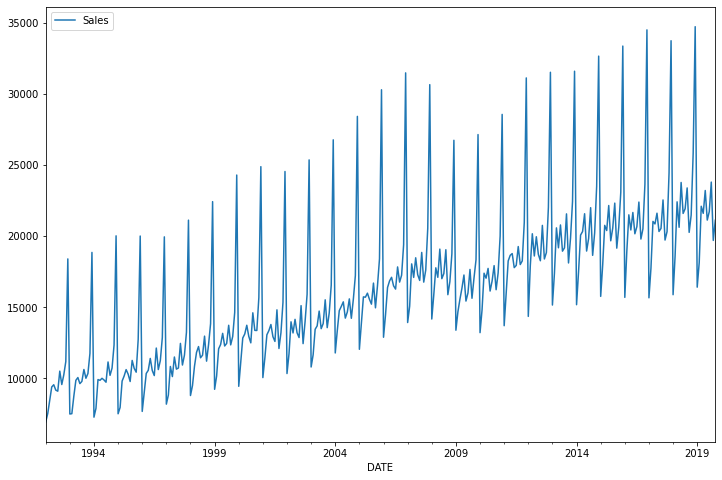

In [ ]:
df.plot(figsize = (12,8))

In [ ]:
len(df)# since monthly data 

334

In [ ]:
len(df)-18

316

In [ ]:
test_size = 18
test_ind = len(df) - test_size

In [ ]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [ ]:
#train

In [ ]:
#test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
len(test)

18

In [ ]:
length = 12 # basically gievn length of 12 months determine the 13th month
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length = length, batch_size = 1)


In [ ]:
X,y = generator [0]

In [ ]:
len(X[0])

12

In [ ]:
y

array([[0.02047633]])

In [ ]:
#scaled_train

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from  tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [ ]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length = length, batch_size = 1)

In [ ]:
model.fit_generator(generator, epochs =20, validation_data = validation_generator, callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
304/304 [==============================] - 6s 12ms/step - loss: 0.0275 - val_loss: 0.0029
Epoch 2/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0194 - val_loss: 0.0037
Epoch 3/20
304/304 [==============================] - 4s 12ms/step - loss: 0.0142 - val_loss: 0.0014
Epoch 4/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 5/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0030 - val_loss: 0.0047
Epoch 6/20
304/304 [==============================] - 3s 10ms/step - loss: 0.0022 - val_loss: 8.0437e-04
Epoch 7/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0011 - val_loss: 0.0015


In [ ]:
losses = pd.DataFrame(model.history.history)

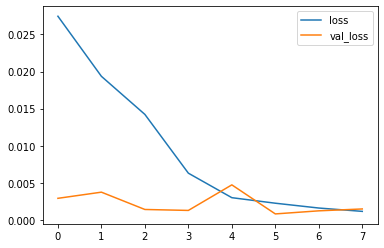

In [ ]:
losses.plot()

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,20351.851343
2018-06-01,21589,19420.928830
2018-07-01,21919,19595.354952
2018-08-01,23381,21134.914538
2018-09-01,20260,19029.137425
2018-10-01,21473,19532.155773
2018-11-01,25831,22794.839050
2018-12-01,34706,32295.183628
2019-01-01,16410,15901.307521


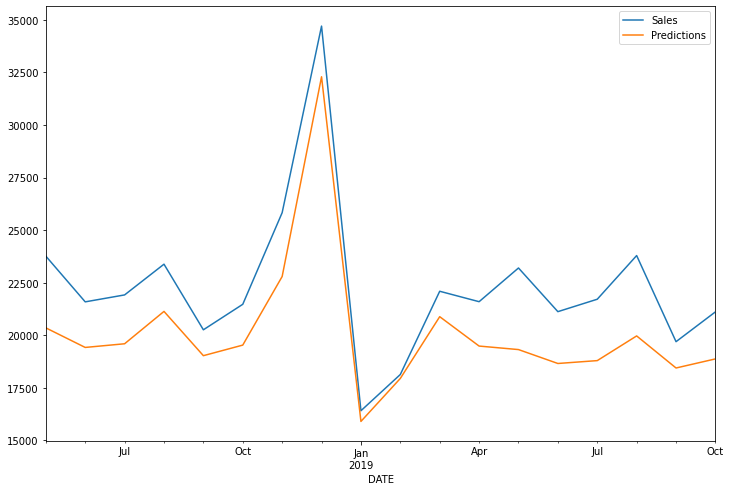

In [ ]:
test.plot(figsize = (12,8))

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, 
                                length = length, batch_size =1 )

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator, epochs = 8 )

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


322/322 [==============================] - 5s 7ms/step - loss: 0.0293
Epoch 2/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0157
Epoch 3/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0081
Epoch 4/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0045
Epoch 5/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0033
Epoch 6/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0023
Epoch 7/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0015
Epoch 8/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0018


In [ ]:
forecast = []
periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [ ]:
forecast.shape

(12, 1)

In [ ]:
forecast_ind = pd.date_range(start='2019-11-01', periods = periods, 
                            freq = "MS")

In [ ]:
forecast_ind

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_ind, columns = ['Forecast'])

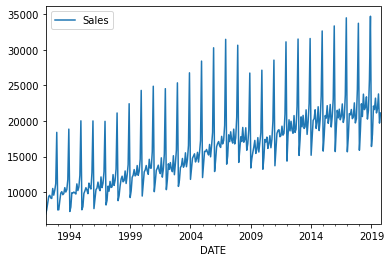

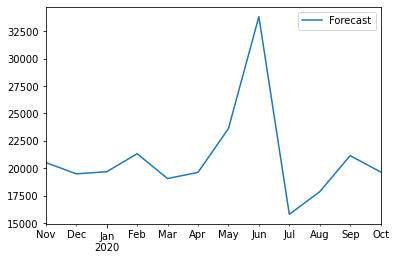

In [ ]:
df.plot()
forecast_df.plot()

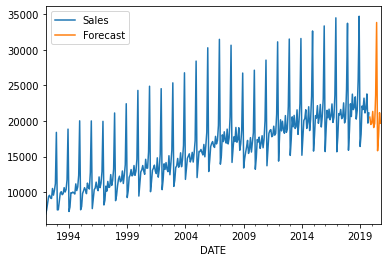

In [ ]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')